In [2]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
sns.set()
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'  # for better quality

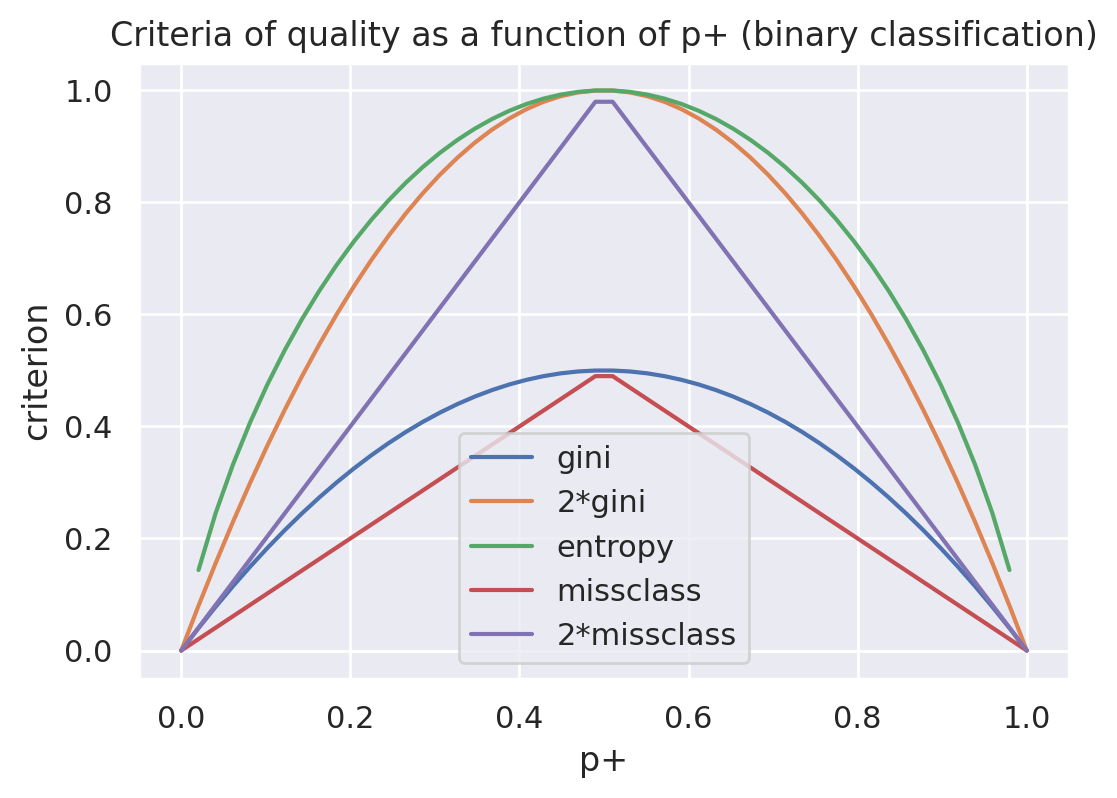

In [3]:
plt.figure(figsize=(6, 4))
xx = np.linspace(0, 1, 50)
plt.plot(xx, [2 * x * (1 - x) for x in xx], label="gini")
plt.plot(xx, [4 * x * (1 - x) for x in xx], label="2*gini")
plt.plot(xx, [-x * np.log2(x) - (1 - x) * np.log2(1 - x) for x in xx], label="entropy")
plt.plot(xx, [1 - max(x, 1 - x) for x in xx], label="missclass")
plt.plot(xx, [2 - 2 * max(x, 1 - x) for x in xx], label="2*missclass")
plt.xlabel("p+")
plt.ylabel("criterion")
plt.title("Criteria of quality as a function of p+ (binary classification)")
plt.legend()

##### If we plot these two functions against the argument p + , we will see that the entropy plot is very close to the plot of Gini uncertainty, doubled. Therefore, in practice, these two criteria are almost identical.

### Let’s consider fitting a decision tree to some synthetic data.

In [4]:
# first class
np.random.seed(17)     # for reproducibility the output is always the same
train_data = np.random.normal(size=(100, 2)) # 100 objects, 2 features
train_labels = np.zeros(100) 
train_labels
# # adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)] # 100 objects, 2 features
train_labels = np.r_[train_labels, np.ones(100)] # class 1

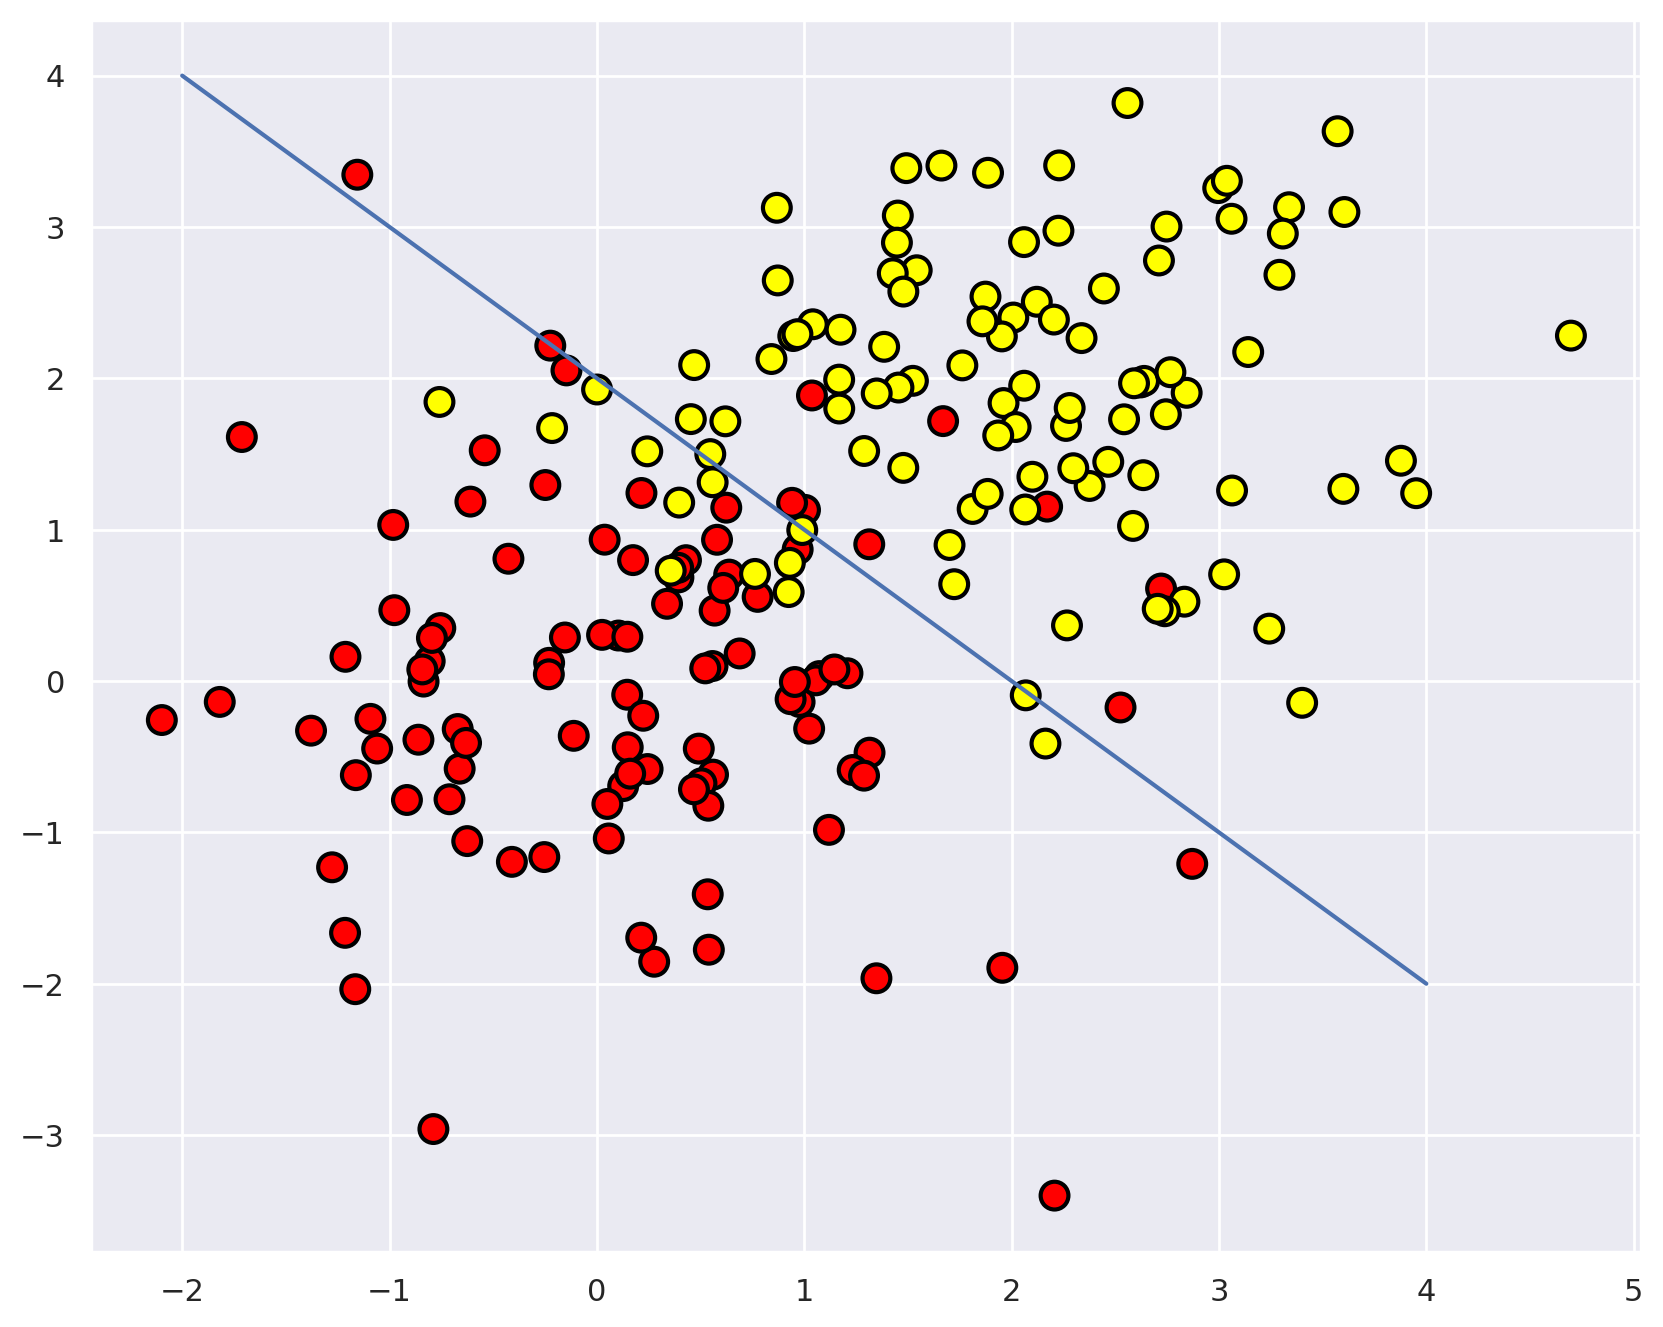

In [5]:
plt.figure(figsize=(10, 8))
plt.scatter(
train_data[:, 0],
train_data[:, 1],
c=train_labels,
s=100,
cmap="autumn",
edgecolors="black",
linewidth=1.5,
)
plt.plot(range(-2, 5), range(4, -3, -1));

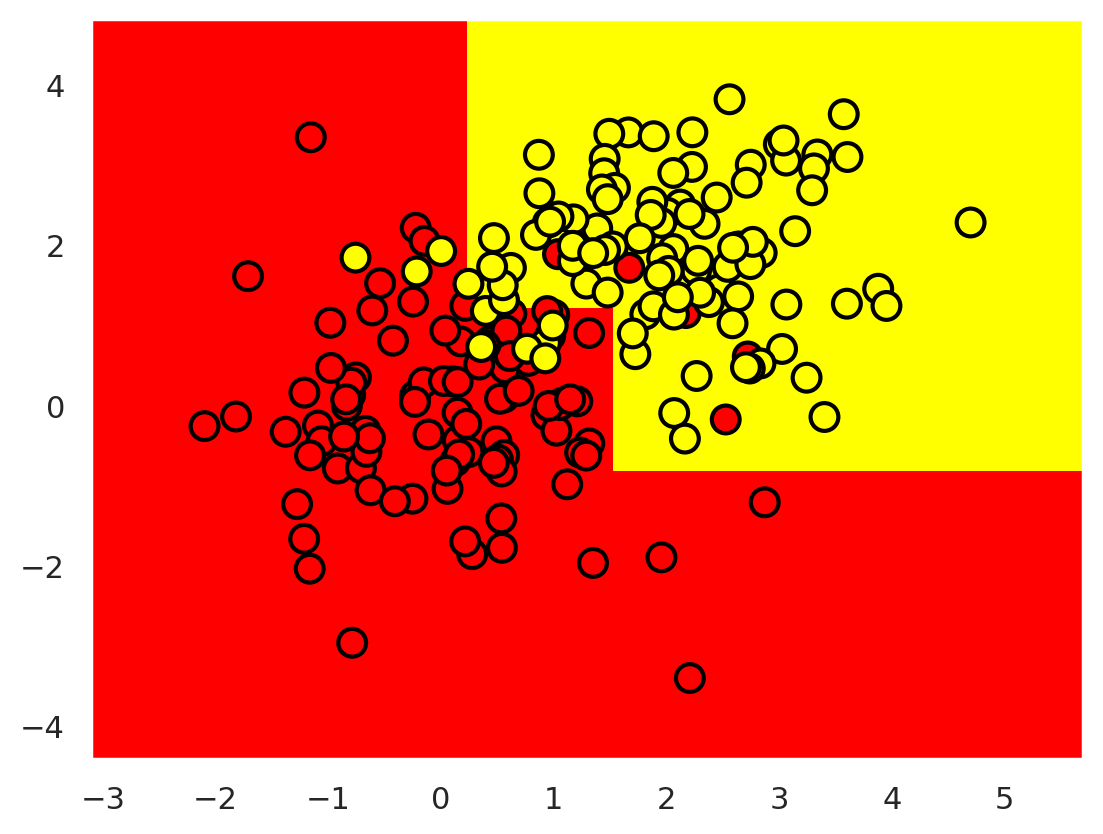

In [6]:
# Let’s write an auxiliary function that will return grid for further visualization
def get_grid(data):
	x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
	y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
	return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=17)
# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
	train_data[:, 0],
	train_data[:, 1],
	c=train_labels,
	s=100,
	cmap="autumn",
	edgecolors="black",
	linewidth=1.5,
);

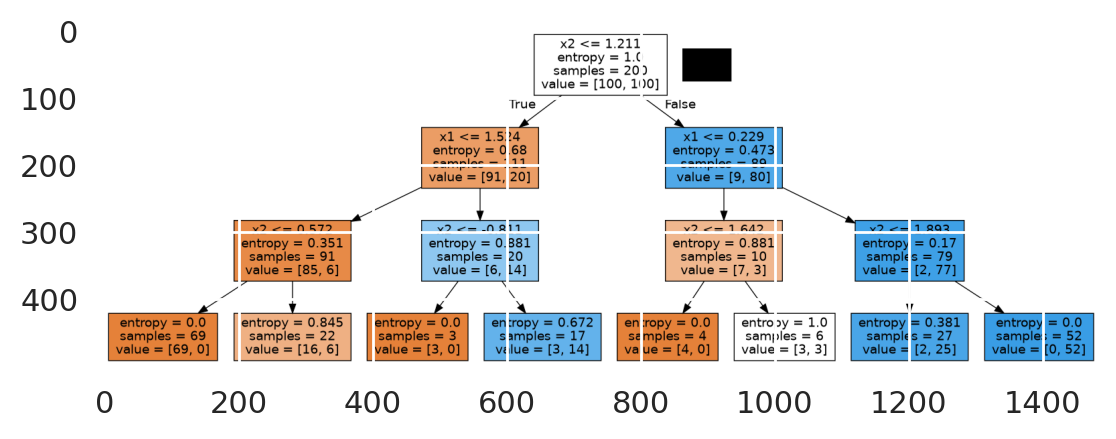

In [14]:
import pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    # needs graphviz to be installed
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

tree_graph_to_png(
    tree=clf_tree,
    feature_names=["x1", "x2"],
    png_file_to_save="topic3_decision_tree1.png",
)
feh = plt.imread("topic3_decision_tree1.png")
plt.imshow(feh)


In [15]:
data = pd.DataFrame(
{
"Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
"Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
}
)
data

,Age,Loan Default
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


In [16]:
data.sort_values("Age")

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [17]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data["Age"].values.reshape(-1, 1), data["Loan Default"].values)
tree_graph_to_png(
    age_tree,
    feature_names=["Age"],
    png_file_to_save="topic3_decision_tree2.png",
    )

In [18]:
data2 = pd.DataFrame(
{
"Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
"Salary": [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88],
"Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
}
)
data2

,Age,Salary,Loan Default
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0


In [20]:
data2.sort_values("Age")

,Age,Salary,Loan Default
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [22]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[["Age", "Salary"]].values, data2["Loan Default"].values)

DecisionTreeClassifier(random_state=17)

In [23]:
tree_graph_to_png(
    tree=age_sal_tree,
    feature_names=["Age", "Salary"],
    png_file_to_save="topic3_decision_tree3.png",
)